###### As the train dataset had very less number of images to train, horse-human test and validation datasets have been created manually. They are provided in the same folder as code.
###### Courtesy: Google images

In [4]:
import os

In [2]:
#Activate GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()

In [5]:
os.getcwd()

'/content'

In [10]:
from zipfile import ZipFile
hnh = '/content/drive/My Drive/horse-or-human.zip'
with ZipFile(hnh, 'r') as zip:
  #zip.printdir() #Prints all the contents, but it is long list to run.
  zip.extractall()

In [8]:
train_horse_dir = '/content/drive/My Drive/horses'
train_human_dir = '/content/drive/My Drive/humans'

In [11]:
train_horse_names = os.listdir(train_horse_dir) 
print(train_horse_names[:10]) 

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [12]:
#Total number of horse and human images for training
print('Horse images',len(train_horse_names))
print('Human images',len(train_human_names))

Horse images 500
Human images 527


In [35]:
CLASSES = ['horse', 'human']

In [13]:
#Visualizing images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#To see 4*4 images in a grid
nrows = 4
ncols = 4
pic_index = 0

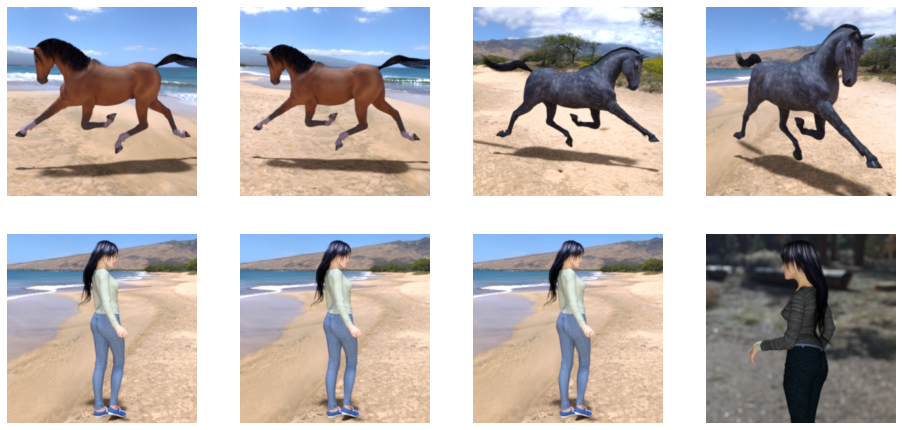

In [17]:
fig = plt.gcf() 
fig.set_size_inches(ncols * 4, nrows * 4) 
 
pic_index += 4 
next_horse_pix = [os.path.join(train_horse_dir, imgname) for imgname in train_horse_names[pic_index-4:pic_index]]
next_human_pix = [os.path.join(train_human_dir, imgname) for imgname in train_human_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix): 
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off")
  
  img = mpimg.imread(img_path)   
  plt.imshow(img) 
 
plt.show()

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescaling on 0 to 1
rescaled = ImageDataGenerator(1/255)
train_set = rescaled.flow_from_directory('/content/drive/My Drive/horse-or-human', target_size = (300,300),
                                                    batch_size = 128, class_mode = 'binary')
test_set = rescaled.flow_from_directory('/content/drive/My Drive/horse_human', target_size = (300,300),
                                                    batch_size = 128, class_mode = 'binary')

Found 1027 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [19]:
model1 = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape = (300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),#To feed into DNN
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])



In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [21]:
from tensorflow.keras.optimizers import RMSprop
model1.compile(loss='binary_crossentropy', optimizer=RMSprop(lr = 0.001), metrics = ['acc'])

In [28]:
history = model1.fit(train_set, epochs=20, validation_data= test_set)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
9/9 [==============================] - 8s 901ms/step - loss: 97.1709 - acc: 0.6465 - val_loss: 8.5143 - val_acc: 0.5500
Epoch 2/20
9/9 [==============================] - 8s 915ms/step - loss: 2.1036 - acc: 0.7731 - val_loss: 3.2289 - val_acc: 0.6500
Epoch 3/20
9/9 [==============================] - 8s 922ms/step - loss: 0.9266 - acc: 0.8588 - val_loss: 3.3308 - val_acc: 0.6500
Epoch 4/20
9/9 [==============================] - 9s 1s/step - loss: 0.2358 - acc: 0.9056 - val_loss: 3.4852 - val_acc: 0.7000
Epoch 5/20
9/9 [==============================] - 8s 909ms/step - loss: 0.7681 - acc: 0.8354 - val_loss: 4.0397 - val_acc: 0.6500
Epoch 6/20
9/9 [==============================] - 9s 1s/step - loss: 0.5316 - acc: 0.8822 - val_loss: 5.6446 - val_acc: 0.6500
Epoch 7/20
9/9 [==============================] - 8s 904ms/step - loss: 0.0233 - acc: 0.9932 - val_loss: 6.3138 - val_acc: 0.6500
Epoch 8/20
9/9 [==============================] - 8s 897ms/step - loss: 0.0061 - acc: 0.9981 - 

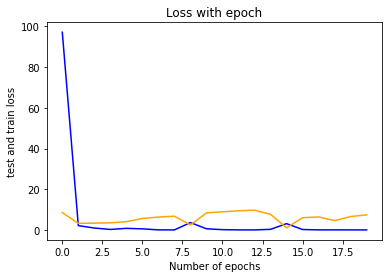

In [29]:
#plotting the results
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'orange', label = 'test')
plt.title('Loss with epoch')
plt.xlabel('Number of epochs')
plt.ylabel('test and train loss')
plt.show() 

In [33]:
#Predict with new dataset
hnh_validation = rescaled.flow_from_directory('/content/drive/My Drive/hnh_validation', target_size = (300,300))
                                                    

Found 10 images belonging to 2 classes.


In [37]:
prediction = model1.predict(hnh_validation)
prediction

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


array([[4.9304958e-06],
       [1.0000000e+00],
       [9.9975950e-01],
       [1.0000000e+00],
       [2.9359749e-06],
       [1.0000000e+00],
       [1.0250744e-11],
       [1.6284116e-17],
       [1.5949081e-07],
       [9.9353880e-01]], dtype=float32)

In [51]:
prediction[0:10]
print(CLASSES[int(prediction[3])])
print(CLASSES[int(prediction[6])])

human
horse
